In [1]:
import pandas as pd
import numpy as np
import mortgage as mtg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Connect to APIs

# start with Citi API

In [3]:
# Wealthfront vs Schwab vs Vangaurd


In [4]:
# buying a home vs investing 
# also should I refinance?

# set variables
home_price = 785000
down_payment = .2
loan = home_price - (home_price * down_payment)
loan_term = 30 # years
interest = .04


print np.pmt(interest/12, loan_term*12, loan)

-2998.16805552


In [5]:

m = mortgage.Mortgage(interest=interest, amount=loan, months=loan_term*12)
mortgage.print_summary(m)
# m.monthly_payment()
# m.total_payout()

                     Rate:      0.040000
             Month Growth:      1.003333
                      APY:      0.040742
             Payoff Years:            30
            Payoff Months:           360
                   Amount:     628000.00
          Monthly Payment:       2998.17
           Annual Payment:      35978.04
             Total Payout:    1079341.20


In [6]:
# We can find the amount of principle paid in the first year.
a = 0
for count, i in enumerate(m.monthly_payment_schedule()):
    print i, i[0] + i[1]
    a += i[0]
    if count == 11:
        break
print a

(Decimal('904.84'), Decimal('2093.33')) 2998.17
(Decimal('907.85'), Decimal('2090.32')) 2998.17
(Decimal('910.88'), Decimal('2087.29')) 2998.17
(Decimal('913.92'), Decimal('2084.25')) 2998.17
(Decimal('916.96'), Decimal('2081.21')) 2998.17
(Decimal('920.02'), Decimal('2078.15')) 2998.17
(Decimal('923.08'), Decimal('2075.09')) 2998.17
(Decimal('926.16'), Decimal('2072.01')) 2998.17
(Decimal('929.25'), Decimal('2068.92')) 2998.17
(Decimal('932.35'), Decimal('2065.82')) 2998.17
(Decimal('935.45'), Decimal('2062.72')) 2998.17
(Decimal('938.57'), Decimal('2059.60')) 2998.17
11059.33


In [4]:
# We can find the amount of principle paid in the first year.
from itertools import islice
print sum(month[0] for month in islice(m.monthly_payment_schedule(), 12))

NameError: name 'm' is not defined

In [8]:
# P = int(input("Enter starting principle please. "))
# n = int(input("Enter Compound intrest rate.(daily, monthly, quarterly, half-year, yearly) "))
# r = float(input("Enter annual interest amount. (decimal) "))
# t = int(input("Enter the amount of years. "))

P = 157000
n = 12
r = .07
t = 30

final = P * (((1 + (r/(100.0 * n))) ** (n*t)))
print final

160331.763908


In [9]:
principal = 157000
rate = .07
times_per_year = 12
years = 1
pmt = 2000

# pmt = np.array([-2000,-1000])

for i in range(1, 13):
    print np.fv(rate/12, i, pmt, -principal)

    
print np.fv(rate/12, times_per_year*years, pmt, -principal), 'er'

155915.833333
154825.342361
153728.490192
152625.239718
151515.553616
150399.394345
149276.724146
148147.505037
147011.698816
145869.267059
144720.171117
143564.372115
143564.372115 er


In [116]:
# put investment and mortgage together
home_price = 785000
down_payment = .2
down_payment = home_price * down_payment
loan = home_price - down_payment
loan_term = 30 # years
interest = .04
# home_appreciation = 1500000
home_appreciation_rate = .02

m = mortgage.Mortgage(interest=interest, amount=loan, months=loan_term*12)

home = []
a = int(down_payment)
for count, i in enumerate(m.monthly_payment_schedule()):
    a += i[0] + i[1]
    home.append(a)

    
rate = .07
mortgage_pay = m.monthly_payment()
property_taxes = 800
hoi = 75
hoa = 130
expense = 200
house_pay = mortgage_pay + property_taxes + hoi + hoa + expense
rent = 2000
rent_increase_rate = .02
pmt = int(house_pay - rent)
# pmt = 0
print 'payment per month:', pmt
print '%s house pay' %house_pay

investment = []
ha  = home_price
home_app = []
cost = []
roi_inv = []
c = int(down_payment)
for i in range(1, (loan_term * 12)+1):
    if i % 12 == 0:
        rent = rent + (rent * rent_increase_rate)
        pmt = float(house_pay) - rent
    c += pmt
    cost.append(c)
    fv = np.fv(rate/12, i, -pmt, -down_payment)
    investment.append(fv)
    roi_inv.append(fv - down_payment - pmt)
    ha = ha + (ha * home_appreciation_rate/12)
    home_app.append(ha)
    
print 'investment:', fv
print 'home value:', ha
print 'diff:', fv - ha
print rent, pmt

payment per month: 2203
4203.17 house pay
investment: 1982418.40301
home value: 1429649.0487
diff: 552769.354309
3622.72316821 580.446831793


In [117]:
200/12

16

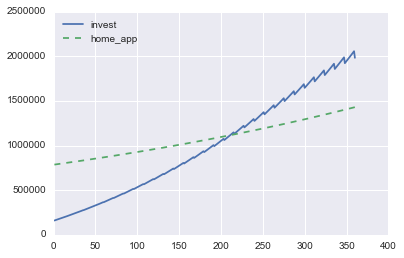

In [120]:
plt.plot(range(1,(30*12)+1), investment, label="invest")
# plt.plot(range(1,(30*12)+1), home, label="home")
# plt.plot(range(1,(30*12)+1), cost, '--', label="cost")
plt.plot(range(1,(30*12)+1), home_app, '--', label="home_app")
# plt.plot(range(1,(30*12)+1), roi_inv, label="roi_inv")
# plt.plot(range(1,(30*12)+1), roi_home, label="roi_home")
plt.legend(loc='upper left')
plt.show()

In [12]:
# refinance
current_time = 15
new_interest = .03
new_loan_term = 30

principal_paid = float(sum(month[0] for month in islice(m.monthly_payment_schedule(), \
                                                 current_time * 12)))
interest_paid = float(sum(month[1] for month in islice(m.monthly_payment_schedule(), \
                                                 current_time * 12)))
new_loan = loan - principal_paid - interest_paid


mR = mortgage.Mortgage(interest=new_interest, amount=new_loan, months=new_loan_term * 12)

new_interest = float(mR.total_payout() - mR.amount())

print new_loan
print mR.monthly_payment()
print mR.total_payout()

88329.4
372.41
134067.60


In [13]:
principal_paid
interest_paid
new_interest + interest_paid

362737.18

In [14]:
m.total_payout() - m.amount()

Decimal('451341.20')

In [2]:
## for investment property

In [149]:
home_price = 785000
down_payment = .2
down_payment = home_price * down_payment
loan = home_price - down_payment
loan_term = 15 # years
interest = .04
# home_appreciation = 1500000
home_appreciation_rate = .03

m = mortgage.Mortgage(interest=interest, amount=loan, months=loan_term*12)
ha  = home_price
house_pay = int(m.monthly_payment())
rent = house_pay
pmt = int(house_pay - rent)

home = []
home_app = []
roi_inv = []
roi_inv30 = []
a = int(down_payment)
b = a
c = 0
# for count, i in enumerate(m.monthly_payment_schedule()):
for i in range(12*30):
#     a += i[0] + i[1]
    b += house_pay
    ha = ha + (ha * home_appreciation_rate/12)
    home_app.append(ha)
    roi_inv30.append(ha - down_payment - pmt)
    if i <= 12 * loan_term:
        a += house_pay
        pmt = float(house_pay) - rent
#         home.append(pmt)
        roi_inv.append(ha - down_payment)
    else:
        c += rent
        roi_inv.append(ha - down_payment + c)
        
print 'home app: ', ha
print 'payments: ', a
print 'diff: ', ha - a
print ha - down_payment + rent
print ha - down_payment
print c

home app:  1928621.13602
payments:  997745
diff:  930876.136024
1776266.13602
1771621.13602
831455


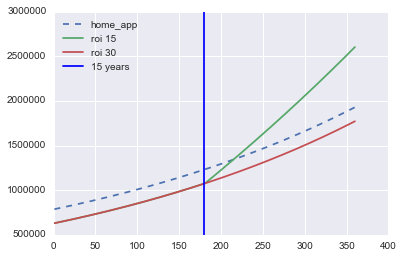

In [150]:
# plt.plot(range(1,(30*12)+1), home, label="invest")
plt.plot(range(1,(30*12)+1), home_app, '--', label="home_app")
plt.plot(range(1,(30*12)+1), roi_inv, '-', label="roi 15")
plt.plot(range(1,(30*12)+1), roi_inv30, '-', label="roi 30")
plt.axvline(15*12, label='15 years')
plt.legend(loc='upper left')
plt.show()

In [2]:
def as_currency(amount):
    if amount >= 0:
        return '${:,.2f}'.format(amount)
    else:
        return '-${:,.2f}'.format(-amount)

# buying vs renting

In [3]:
## variables asked
home_price = 785000
down_payment_percent = .2
interest = .04
loan_term = 30
house_rent = 3100
house_rent_term_years = 0
current_rent = 2500
pmi = 0
# from all sources
income = 130000
# zip_code = 94303  # possibly to look up property tax rates

In [4]:
## variables assumed
down_payment = down_payment_percent * home_price
loan_amount = home_price - down_payment
m = mtg.Mortgage(interest=interest, amount=loan_amount, months=loan_term*12)
monthly_payouts = [i for i in m.monthly_payment_schedule()]
mortgage = float(m.monthly_payment())
total_interest_paid = float(m.total_payout()) - loan_amount
hoi = 75
property_tax_rate = .0125
property_tax_payment_monthly = (float(property_tax_rate) * home_price) / 12.
monthly_property_tax_amount = (property_tax_rate * home_price) / 12.
home_appreciation_rate = .04
rent_appreciation_rate = .03
closing_cost_rate = .02
closing_costs = home_price * closing_cost_rate
arr = .06
years = 30
# maintence_rate = .0025
total_monthly_house_payment = mortgage + hoi + property_tax_payment_monthly

# for 2017
if income < 9325:
    income_tax_rate = .1
elif income >= 9325 and income < 37950:
    income_tax_rate = .15
elif income >= 37950 and income < 91900:
    income_tax_rate = .25
elif income >= 91900 and income < 191650:
    income_tax_rate = .28
elif income >= 191650 and income < 416700:
    income_tax_rate = .33
elif income >= 416700 and income < 418400:
    income_tax_rate = .35
else:
    income_tax_rate = .396
    

final new rent: $3,890.88
total home payment (including down payment and closing costs): $1,573,416.20
total home payment (minus tax deduction for interest): $1,447,040.99
total deductions: $126,375.21
total rent payment: $1,470,080.35
difference (pay this more for house): $103,335.85


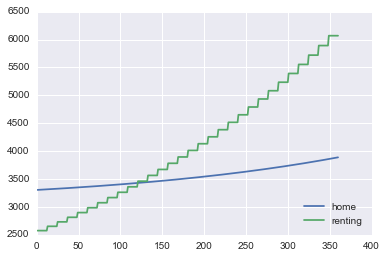

In [5]:
## total payouts
home_payout = []
home_payout_int = []
rent_payout = []
new_current_rent = current_rent
# new_total_monthly_house_payment = total_monthly_house_payment + down_payment
total_deductions = 0

for i in range(years * 12):
# for i in range(loan_term * 12):

    # add up total cost ?? add in maintence
#     total_monthly_house_payment = principal + interest + hoi + property_tax_payment_monthly

    # subtract house rent
    if i < house_rent_term_years * 12:
        new_total_monthly_house_payment = total_monthly_house_payment - house_rent
    else:
        new_total_monthly_house_payment = total_monthly_house_payment
    
    
    if i <= loan_term * 12:
        home_payout.append(new_total_monthly_house_payment)
        # deduct interest
        interest = float(monthly_payouts[i][1])
#         principal = float(monthly_payouts[i][0])
        ded = (interest * income_tax_rate)
        act_house_pay = new_total_monthly_house_payment - ded
        total_deductions += ded
        home_payout_int.append(act_house_pay)
    else:
        home_payout.append(new_total_monthly_house_payment - mortgage)
        home_payout_int.append(new_total_monthly_house_payment - mortgage)
        
    # every year have rent increase
    if i % 12 == 0:
        new_current_rent += new_current_rent * rent_appreciation_rate
    rent_payout.append(new_current_rent)
        

total_home_pay = sum(home_payout) + down_payment + closing_costs
total_home_pay_int = sum(home_payout_int) + down_payment + closing_costs
print 'final new rent:', as_currency(new_total_monthly_house_payment)
print 'total home payment (including down payment and closing costs):', as_currency(total_home_pay)
print 'total home payment (minus tax deduction for interest):', as_currency(total_home_pay_int)
print 'total deductions:', as_currency(total_deductions)
print 'total rent payment:', as_currency(sum(rent_payout))
print 'difference (pay this more for house):', as_currency(float(total_home_pay) - sum(rent_payout))

plt.plot(range(1,(years * 12)+1), home_payout_int, '-', label="home")
plt.plot(range(1,(years * 12)+1), rent_payout, '-', label="renting")
if years > loan_term:
    plt.axvline(loan_term * 12, label='30 years', color='grey', linestyle='--')
plt.legend(loc='lower right')
plt.show()

total house pay: $1,400,716.20
total house worth: $2,601,095.94
total investment worth: $505,304,056.22
total home net worth: $409,739.19
total inv net worth: $252,317,782.12
difference (have this much more if invest): $251,908,042.93


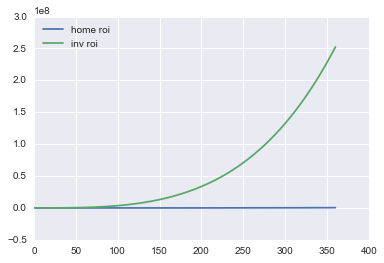

In [6]:
## Net worth: home vs investing
## total payouts
home_nw = []
roi = []
new_current_rent = current_rent
new_total_monthly_house_payment = 0
ha = home_price
home_net_worth = home_price
investment = down_payment
net_inv = down_payment
total_rent = 0
years = 30
for i in range(years * 12):
# for i in range(loan_term * 12):
    # subtract house rent
    if i < house_rent_term_years * 12:
        new_total_monthly_house_payment += total_monthly_house_payment - house_rent
    else:
        new_total_monthly_house_payment += total_monthly_house_payment
    
    if i <= loan_term * 12:
        # changed to include total mortgage payment and net worth at every step
        home_add_ons = new_total_monthly_house_payment - mortgage
        interest = float(monthly_payouts[i][1])
        act_house_pay = new_total_monthly_house_payment - (interest * income_tax_rate)
        home_net_worth = ha - home_price - home_add_ons + interest * income_tax_rate
    else:
        total_monthly_house_payment = total_monthly_house_payment - mortgage
        home_add_ons = new_total_monthly_house_payment
        home_net_worth = ha - home_price - home_add_ons
    
    home_nw.append(home_net_worth)
    ha += (ha * home_appreciation_rate / 12.) 
    
    # every year have rent increase
    if i % 12 == 0:
        new_current_rent += new_current_rent * rent_appreciation_rate
    
    total_rent += new_current_rent
    net_inv += new_total_monthly_house_payment - new_current_rent
    investment += new_total_monthly_house_payment - new_current_rent
    investment += (investment * arr / 12.)
    roi_inv = investment - net_inv - total_rent
    roi.append(roi_inv)
    

# print total_rent, net_inv, net_inv + total_rent
print 'total house pay:', as_currency(new_total_monthly_house_payment)
print 'total house worth:', as_currency(ha)
print 'total investment worth:', as_currency(investment)
print 'total home net worth:', as_currency(home_net_worth)
print 'total inv net worth:', as_currency(roi_inv)
print 'difference (have this much more if invest):', as_currency(roi_inv - home_net_worth)

plt.plot(range(1,(years * 12)+1), home_nw, '-', label="home roi")
plt.plot(range(1,(years * 12)+1), roi, '-', label="inv roi")
if years > loan_term:
    plt.axvline(loan_term * 12, label='30 years', color='grey', linestyle='--')
plt.legend(loc='upper left')
plt.show()

In [ ]:
## try to find how much you can rent for to equal same as buying, work backwards

# saving vs investing